In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

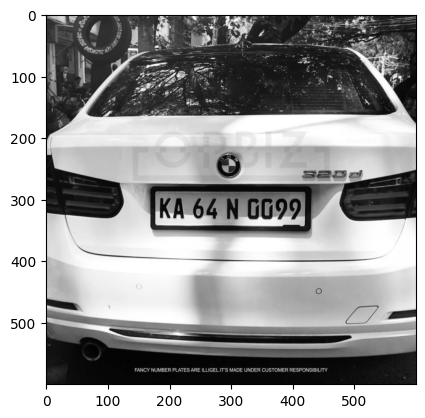

In [189]:
img = cv2.imread("1.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

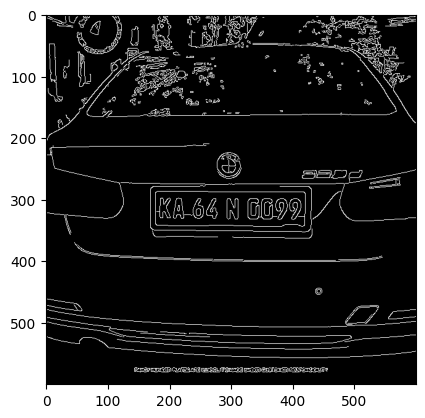

In [190]:
bfilter = cv2.bilateralFilter(gray, 11, 50, 50) 
edged = cv2.Canny(bfilter, 30, 200, L2gradient=True) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [191]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [192]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 8, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[177, 289]],

       [[179, 342]],

       [[419, 342]],

       [[418, 288]]], dtype=int32)

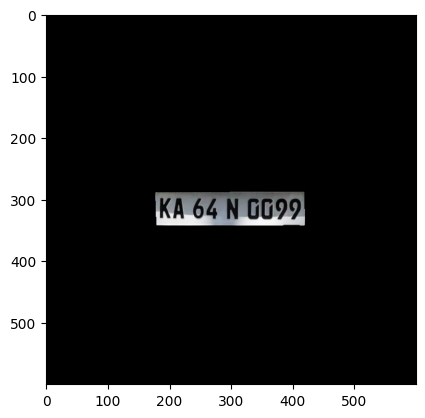

In [193]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

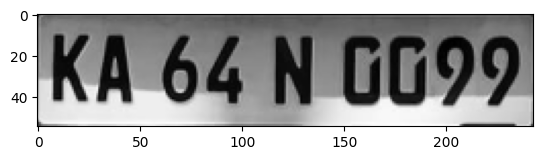

In [194]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [195]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
text = result[0][-2]
clean_text = ''.join(c for c in text if c.isalnum()).upper()
clean_text

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


'KA64N0099'